<a href="https://colab.research.google.com/github/Q-Nhabinde/ML-DA-S/blob/main/Medical_Charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing and Cleaning


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [65]:
df = pd.read_csv("/content/medical-charges.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [66]:
print("1. Displaying all columns:", df.keys())
print('--------------------------------------------------------------------------------')
print("2. The first ten rows of the dataset are:",df.head(10))
print('--------------------------------------------------------------------------------')
print("3. The data shape is:", df.shape)
print('--------------------------------------------------------------------------------')
print("4. Return the number of null values in each column:", df.isnull().sum())
print('--------------------------------------------------------------------------------')
print("5. Using describe() to display the generated descriptive statistics:", df.describe())

1. Displaying all columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
--------------------------------------------------------------------------------
2. The first ten rows of the dataset are:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
----------------------------------------------------------

#Data Exploration and Visualisation


In [41]:
import matplotlib # import the matplotlib module
import plotly.express as px
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The minimum age is 18 and maximum age is 64. using histogram to visualize the distribution with 47 bins(one for each year) and a box plot ( it shows the max and minimum, mean and medium and all quartiles)


In [42]:
df.age.describe()
fig = px.histogram(df, x="age", nbins=47, title="Age Distribution", marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

the age distribuition is uniform, each withh 20-30 customers at every age (minus the ages 18 and 19, which is twice as the over ages.)

In [43]:
fig = px.histogram(df, x="bmi", title="BMI Distribution", marginal='box',
                   color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

Normal Distribuition is seen. most people have a bmi in the range of 25-35, which represents the average human ration of WxH.

In [44]:
#Analysing/Predicting the anual charges of Smokers and Non-smokers customers
fig = px.histogram(df, x="charges", title="Anual Medical Charges",
                   marginal='box',
                   color='smoker' ,
                   color_discrete_sequence=['green', 'grey'])
fig.update_layout(bargap=0.1)
fig.show()

Most costumers pay 10,000 in medical charges anually. people with higher medical expenses pay more due to accidents, ilness or genetical diseases.
Non-Smokers pay in mediam 7300 while smokers apy 35,000.

In [45]:
fig = px.histogram(df, x="region", y="charges", color="sex",
                   title="Annual Medical Charges based on sex and Region",
                   marginal='box',
                   color_discrete_sequence=['hotpink', 'blue'])
fig.update_layout(bargap=0.1)
fig.show()

The southeast (pink) region has the most significant representation among both females and males.
The northeast (light yellow) region has the lowest representation for both sexes.
The northwest (hotpink) and southwest (yellow) regions are more balanced in their distribution across both sexes but are not as dominant as the southeast.

In [46]:
#Visualizing the smoker column

print("smokers count:", df.smoker.value_counts())
px.histogram(df, x='smoker', color='sex', title='Smokers vs Non-Smokers')

smokers count: smoker
no     1064
yes     274
Name: count, dtype: int64


20% of the customers are smokers.

In [47]:
 #Relationship between Age and Charges

fig = px.scatter(df, x='age', y='charges', color='smoker',
                   title="Age vs. Charges",
                   opacity=0.7,
                  hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

Each point represents a customer.
Medical charges increase with age with a little variance at each age.
It's noticed that age along cannot be used to determine medical charges
Three Clusters of points are seen:
1. The first being of non-smokers
2. The second being a mix smokers and non-smokers;
3. The third being of smokers

In [48]:
#Relationship between BIM and Charges

fig = px.scatter(df, x='bmi', y='charges', color='smoker',
                   title="Age vs. Charges",
                   opacity=0.7,
                  hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

BMI is not related to an increase of medical charges.
Medical charges seem to be higher for smokers with BMI greater than 30.

In [49]:
# visualizing how the charges column is related to other columns (children, sex, region ans smoker) summarize the insights of the graphs. use violin chart

# Relationship between Children and Charges
fig = px.violin(df, x='children', y='charges',
                title='Relationship between Children and Charges')
fig.show()
print("Children vs Charges:")


# Relationship between Sex and Charges
fig = px.violin(df, x='sex', y='charges',
                title='Relationship between Sex and Charges')
fig.show()
print("Sex vs Charges:")


# Relationship between Region and Charges
fig = px.violin(df, x='region', y='charges',
                title='Relationship between Region and Charges')
fig.show()
print("Region vs Charges:")
# Insights:

# Relationship between Smoker and Charges (already visualized with histogram earlier, but violin plot can provide more insights)
fig = px.violin(df, x='smoker', y='charges',
                title='Relationship between Smoker and Charges')
fig.show()
print("Smoker vs Charges:")


Children vs Charges:


Sex vs Charges:


Region vs Charges:


Smoker vs Charges:


**Relationship between Children and Charges**

- Having more children doesn't seem to have a strong correlation with higher charges.
- Smokers tend to have higher charges regardless of the number of children.

Relationship between Sex and Charges
- Males and females have a similar distribution of charges.
- Smokers tend to have significantly higher charges compared to non-smokers, regardless of sex.


**Relationship between Region and Charges**

 - The distribution of charges seems to be similar across different regions.
- The southeast region might have slightly higher charges compared to other regions.
- Smokers in each region tend to have higher charges compared to non-smokers in the same region.


**Relationship between Smoker and Charges**
- Smokers have a much higher distribution of charges compared to non-smokers.
- The difference in charges between smokers and non-smokers is quite significant.


#Correlation/Feature Engineering

In [57]:
print("Charges vs Ages Correlation:",df.charges.corr(df.age))
print("Charges vs BMI Correlation:", df.charges.corr(df.bmi))
print("Charges vs Childer Correlation:", df.charges.corr(df.children))

smoker_corr = df.smoker.map({'yes': 1, 'no': 0})
print("Smoker vs Charges Correlation:", smoker_corr.corr(df.charges))

Charges vs Ages Correlation: 0.2990081933306476
Charges vs BMI Correlation: 0.19834096883362895
Charges vs Childer Correlation: 0.06799822684790478
Smoker vs Charges Correlation: 0.7872514304984779


By using Linear Regression we can fit the models (age and charges) in to a strainght line by assuming/using the folling relationship:
*Charges = w * age + b*

where the values of the age column is the input to the model and the values on the charges column willl be the targets.


Ages: 1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64
--------------------------------------------------------------------------------
Estimated Charges: 1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64
--------------------------------------------------------------------------------
Comparing non-smokers charges with the actual charges 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64
--------------------------------------------------------------------------------


Text(0.5, 1.0, 'Age vs Charges')

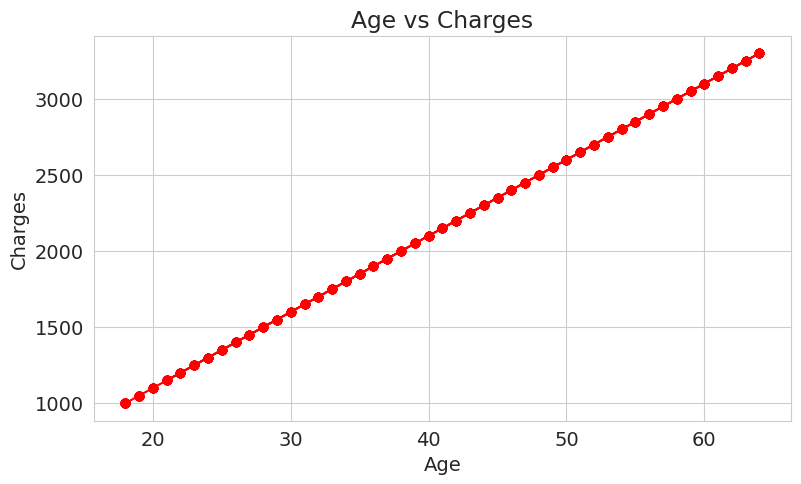

In [141]:
w=50
b=100

def estimate_charges(age, w, b):
    return w * age + b

ages = non_smokers.age
print("Ages:", ages )
print('--------------------------------------------------------------------------------')
charges = estimate_charges(ages,w, b)
print("Estimated Charges:", charges)
print('--------------------------------------------------------------------------------')
print("Comparing non-smokers charges with the actual charges",non_smokers.charges)
print('--------------------------------------------------------------------------------')
plt.plot(ages, charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')

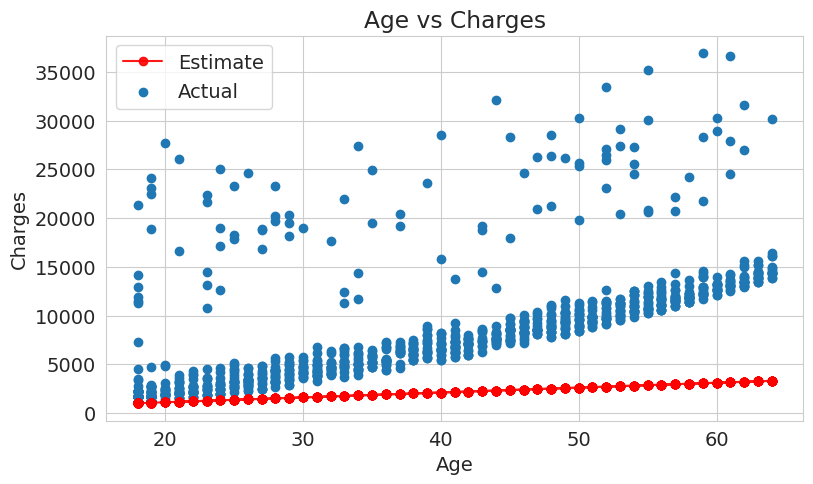

In [144]:
#Overlaying the line above with actual data to see if the model fits or not

target = non_smokers.charges
plt.plot(ages, charges, 'r-o', alpha=0.9, label='Estimate')
plt.scatter(ages, target, label='Actual')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.legend()

In [145]:
def try_parameters(w, b):
  ages = non_smokers.age
  target = non_smokers.charges
  charges = estimate_charges(ages, w, b)
  plt.plot(ages, charges, 'r-o', alpha=0.9, label='Estimate')
  plt.scatter(ages, target, label='Actual', s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.title('Age vs Charges')
  plt.legend()

None


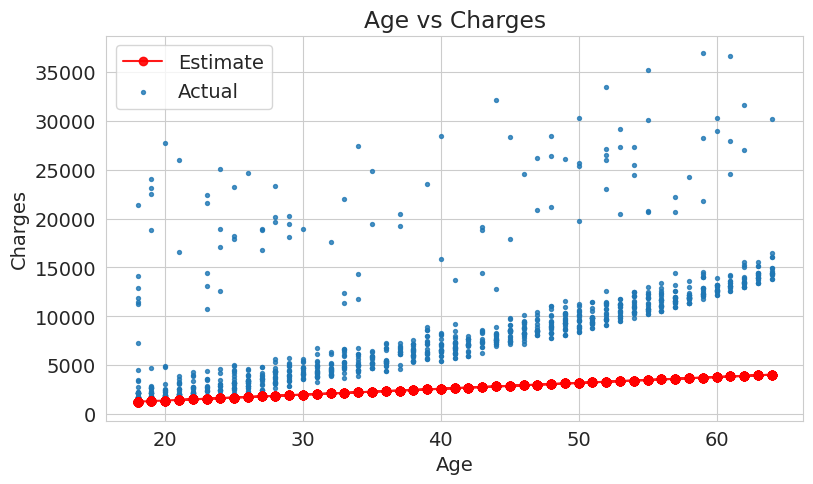

In [146]:
print(try_parameters(60, 200))

The estimate (red) is based on the values of W & B, wich are 50 and 100. The charges (blue) are the different customers that the dataset has. it is seen that the estimate is poor and the line does not fit the data.

Using different values for both W and B miaght move the line.


None


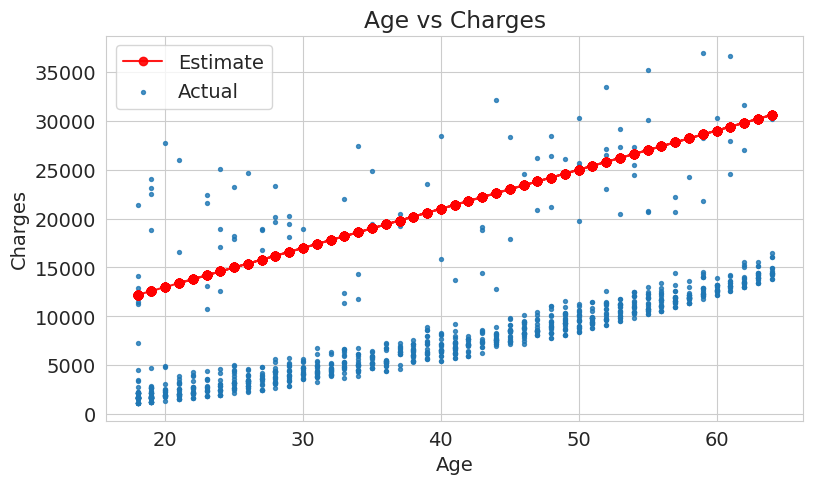

In [147]:
print(try_parameters(400, 5000))

By using different values for W and B manually, the relationship between age and changes can be seen as well as moving the line closer. As i changed the values of Bias and Weight line is moving up and down.

**Loss/Cost Funtion - **

we comare the models prediction with actual targes by:
1.  claculating the difference between targets and predictions;

2. square all elemnts of the matrix to remove neg. values;

3. calculate average of the elements in the matrix;

4. take square rrot of the resuts and we obtain the root mean squared error RMSE.

Error - is the difference between targets and predictions;

In [100]:
#calculating the difference between targets and predictions;
targets = non_smokers.charges
print("Targets",targets)
print('--------------------------------------------------------------------------------')
predictions = charges
print("Predictions", predictions)
print('--------------------------------------------------------------------------------')
errors = targets - predictions
print("Differecnce between T and P:", errors)

Targets 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64
--------------------------------------------------------------------------------
Predictions 1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64
--------------------------------------------------------------------------------
Differecnce between T and P: 1         725.55230
2        2949.46200
3       20234.47061
4        2166.85520
5        2106.62160
           ...     
1332     8711.68500
1333     8000.54830
1334     1205.98080
1335      629.83350
1336      857.94500
Length: 1064, dtype: float64


In [105]:
#square all elemnts of the matrix to remove neg. values
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))
targets = non_smokers['charges']
predicted = estimate_charges(non_smokers.age, w, b)
rmse(targets, predicted)

8461.949562575493

we can say that, on Average each element in the predictions differs by $8461 from the target.
the result is a *Loss*, beacause it shows how bad the model is at predicting the target variable. it represents information loss - * the lower the loss, the better the model. The higher the loss, the more noisy amd useless the model is*

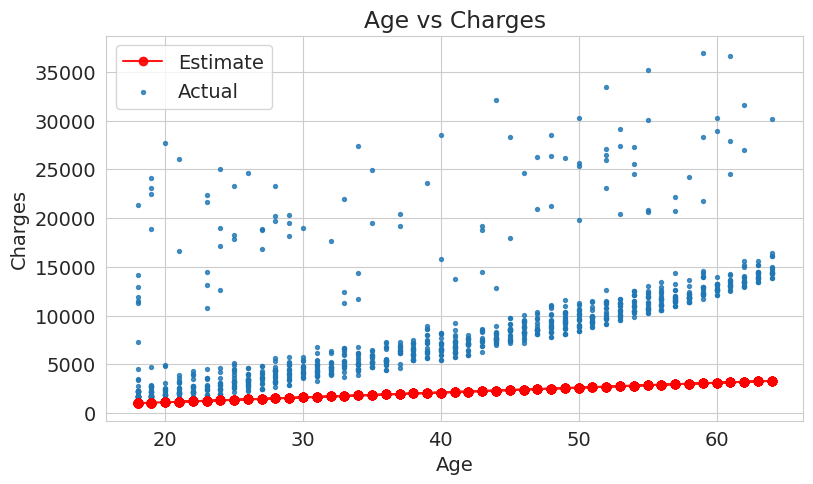

In [106]:
try_parameters(w,b)

In [114]:
def try_parameters(w, b):
  ages = non_smokers.age
  target = non_smokers.charges
  predictions = estimate_charges(non_smokers.age, w, b)

  plt.plot(ages, predicted, 'r', alpha=0.9, label='Estimate')
  plt.scatter(ages, target, label='Actual', s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.title('Prediction vs Actual')
  plt.legend()

  loss=rmse(target, predictions)
  print("RMSE Loss:", loss)


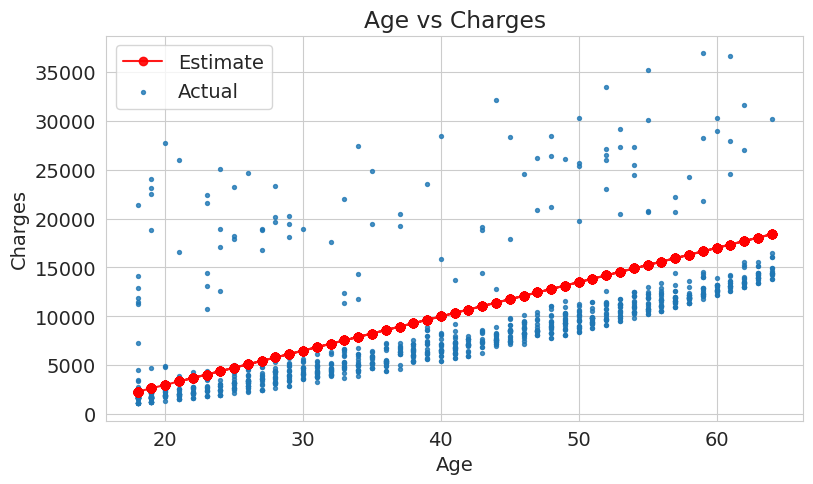

In [148]:
 try_parameters(350,-4000)

#Linear Regression

In [119]:
model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [120]:
inputs = non_smokers[['age']]
targets = non_smokers['charges']
model.fit(inputs, targets)
print("input shapes:", inputs.shape)
print("target shapes:", targets.shape)

input shapes: (1064, 1)
target shapes: (1064,)


In [121]:
model.predict(np.array([[23], [37], [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

by predicting the charges for the ages 23, 37, 61, we precticted the above values. we can say that the model is doing a great job since for ages below 23 the charges are of $4000


In [126]:
#Predicting for the entire set of inputs

predictions = model.predict(inputs)
print("Predictions:", predictions)
print("Inputs", inputs)
print("Predictions", predictions)
print("Targets", targets)

Predictions: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Inputs       age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns]
Predictions [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Targets 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [127]:
#predicting loss

rmse(targets, predictions)

4662.505766636395

our predictions is of by $4000 on average, which is not bad when knowing that there are many outliers.

In [128]:
print ("w:", model.coef_)
print ("b:", model.intercept_)

w: [267.24891283]
b: -2091.4205565650864


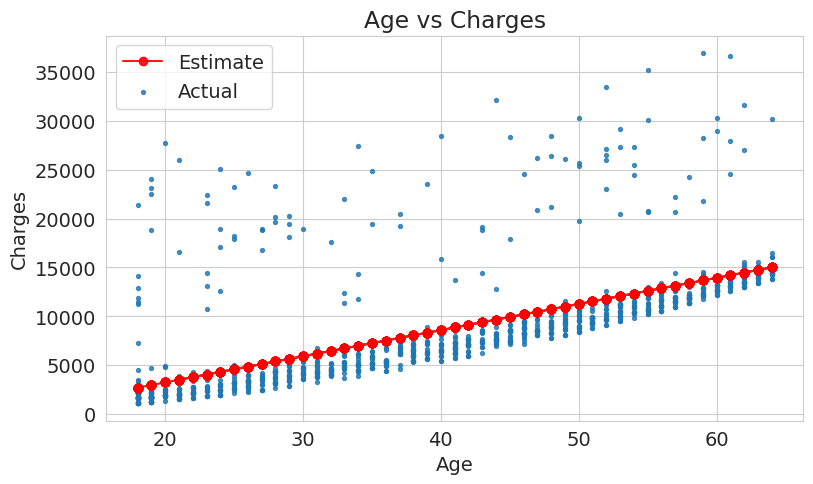

In [149]:
try_parameters(model.coef_, model.intercept_)